In [28]:
import glob
import csv
import os
from tsne import bh_sne
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import StratifiedKFold                                                                                                                       
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn import svm

import numpy as np
from numpy.random import RandomState
np.random.seed(1)

In [3]:
flist = glob.glob("train/*.bytes")

In [4]:
num_samples = len(flist)
print("Number of samples: %i" %(num_samples))

Number of samples: 10868


In [5]:
flist

['train/2jf7mkt8YCUM3AriKVas.bytes',
 'train/3oMQAPEXqKpiBlHvOJYz.bytes',
 'train/AxMQBldJRotHf69j32PG.bytes',
 'train/27o93DUCHcGPXdTxlNwg.bytes',
 'train/kaz4GujLsES3IDtnXc10.bytes',
 'train/9gBVZNKoIPkFM8vOp45G.bytes',
 'train/jvGIm6Yu2XKcE8hr4gMy.bytes',
 'train/aZKEkJF7CQtNSDf64d0P.bytes',
 'train/7cA9IVu3YOH5r8hK42wD.bytes',
 'train/3ftwoRhscPpNCxdlIbrU.bytes',
 'train/hGrRVejLFzNtXcBW6s2p.bytes',
 'train/5fsyaH409vx3SUXN2jOq.bytes',
 'train/7RVrih9gAL1FodIKNTc2.bytes',
 'train/l3iRBsCVb4Z81TLNxSgM.bytes',
 'train/HZI8SimVhNLz1JD5fbyW.bytes',
 'train/hrMLJ7DFIfmUGPB2q8y1.bytes',
 'train/DkNYd806tFbgoJ4zf1UA.bytes',
 'train/je3Im0RAozk8M7gnlXiO.bytes',
 'train/i5XIeh8WyrO79NklcwBJ.bytes',
 'train/gPUaRd12vzpH7lkV5DhG.bytes',
 'train/FalYuVzr8LgtiKRZ9oEy.bytes',
 'train/JVdaIxt2DBu8Ez0cH5gY.bytes',
 'train/IBEoqZCidDj8LlUGg6u9.bytes',
 'train/aM4JPZrzBXhgSCF8UTVb.bytes',
 'train/4BrHgYquho9skZMR06ea.bytes',
 'train/3k1meX0gV2WMjAvGDrCq.bytes',
 'train/dZv5FgTBxasz7GMhKRSL.bytes',
 

In [6]:
vectorizer = CountVectorizer(input='filename', ngram_range=(2, 2), stop_words=None, token_pattern=r'\b\w\w\b', min_df=1)

In [7]:
X = vectorizer.fit_transform(flist)

In [8]:
X = X.todense()

In [9]:
X

matrix([[  6224,     45,     26, ...,     13,     16,    233],
        [  6620,     54,     42, ...,     26,     40,     83],
        [ 21554,    717,     93, ...,     28,     39,   7395],
        ..., 
        [  2732,     27,     10, ...,      5,      2,     25],
        [291225,   1599,   1176, ...,      7,      8,    642],
        [ 11700,    167,     62, ...,      2,      0,    758]], dtype=int64)

In [10]:
X.shape

(10868, 65536)

In [26]:
file2gram = "Microsoft-byte2gram.npy"
np.save(file2gram,X)

In [11]:
trainLabelFile = "trainLabels.csv"

In [12]:
with open(trainLabelFile) as f:
    labelDict = dict(filter(None, csv.reader(f)))

In [13]:
labelDict

{'2Ep7f84CvJDn9NwMHBPK': '3',
 'FzZLCbl3pMjoh6sWd8RY': '3',
 'itKaznkWYBjsPd2obgJq': '2',
 '7zr2DsIWVvgJmx3ik4L8': '2',
 '40KRbGeQZ8PwcUgt5joa': '5',
 '6ByMewHIzS0LpsWdXZU1': '1',
 'jC9SO83DwoU4ZBRnpNHA': '2',
 '6WuXimIJaPd3x8QoGUH0': '3',
 'Hl76G9NEXne5FzjwYkUJ': '3',
 '7qXRGMD4gi8VkIWSjyeF': '2',
 '13FZ9DOhywk78sJiVULu': '9',
 '4ng9zuri2Dtm5H8INwxF': '9',
 'dXB9U7M1pgt8lPGhyNuo': '3',
 'BptGe4VriOWLUXmwoN81': '1',
 'IidxQvXrlBkWPZAfcqKT': '1',
 'EKswVBcd1UWjLfukhSF5': '3',
 'gft9ec83zWbM46yJNxFX': '2',
 'JnX9eYfjBik8KzyGE7sM': '6',
 'fdGV3HjRu4nBSMNibIkX': '3',
 '4GLY2XFSEMmB6CVsAJ9f': '2',
 'bJvcld8YQ9OxDAnwtSfp': '7',
 '2UfwYHR03ZMokQgFAzqt': '2',
 '3Isqvz4GW6LAxUaZP7f0': '2',
 'JNGf3qzH2oLvBXDSM6Fp': '9',
 'IdZTfRtJk1hvGaei3P4A': '1',
 '2amRyMxPKTXJwibdWHu8': '3',
 'gRNpMreFHS8QmAql5OiL': '2',
 'K18LQkydvn2l5HUxOquT': '1',
 'iOIdv3emQfZN5jS9XFAu': '8',
 '3fxHsVZeOikwBYzM5KCJ': '1',
 '1iFYGHfzdnCJRXA5uby9': '3',
 'hSvEjCqKdFGUgplHiX3s': '1',
 'jg539ocuMFHT8wErzAxV': '1',
 'fiwJGn6g

In [14]:
y = np.zeros(num_samples)
pos = 0
for f in flist:
    fname = os.path.splitext(os.path.basename(f))[0]
    print("File: %s - Class: %s" %(fname,labelDict[fname]))
    y[pos] = int(labelDict[fname])
    pos += 1

File: 2jf7mkt8YCUM3AriKVas - Class: 3
File: 3oMQAPEXqKpiBlHvOJYz - Class: 3
File: AxMQBldJRotHf69j32PG - Class: 2
File: 27o93DUCHcGPXdTxlNwg - Class: 3
File: kaz4GujLsES3IDtnXc10 - Class: 1
File: 9gBVZNKoIPkFM8vOp45G - Class: 2
File: jvGIm6Yu2XKcE8hr4gMy - Class: 3
File: aZKEkJF7CQtNSDf64d0P - Class: 4
File: 7cA9IVu3YOH5r8hK42wD - Class: 9
File: 3ftwoRhscPpNCxdlIbrU - Class: 2
File: hGrRVejLFzNtXcBW6s2p - Class: 8
File: 5fsyaH409vx3SUXN2jOq - Class: 8
File: 7RVrih9gAL1FodIKNTc2 - Class: 1
File: l3iRBsCVb4Z81TLNxSgM - Class: 4
File: HZI8SimVhNLz1JD5fbyW - Class: 9
File: hrMLJ7DFIfmUGPB2q8y1 - Class: 1
File: DkNYd806tFbgoJ4zf1UA - Class: 8
File: je3Im0RAozk8M7gnlXiO - Class: 2
File: i5XIeh8WyrO79NklcwBJ - Class: 1
File: gPUaRd12vzpH7lkV5DhG - Class: 3
File: FalYuVzr8LgtiKRZ9oEy - Class: 2
File: JVdaIxt2DBu8Ez0cH5gY - Class: 6
File: IBEoqZCidDj8LlUGg6u9 - Class: 3
File: aM4JPZrzBXhgSCF8UTVb - Class: 1
File: 4BrHgYquho9skZMR06ea - Class: 3
File: 3k1meX0gV2WMjAvGDrCq - Class: 3
File: dZv5Fg

File: IUhoJuZ2y0iWz7sPx1cb - Class: 8
File: 71zK8WqnBXjFkHvscDNw - Class: 8
File: dQNpWIX76sBo4q1RbMJx - Class: 3
File: e0fdQp9N2PYB5ShZy4GD - Class: 8
File: 5zfkYBOKTD2NjpdI43Eo - Class: 3
File: ilogAd4QsU38IFBcuwDp - Class: 1
File: gjOIy9sRbtFGoWASY16c - Class: 2
File: dAabnhJ37zorISO68q4l - Class: 2
File: I5JmqLczQG4Or2tvaejb - Class: 8
File: fs9oYJKeZ4BzXSlIWy3E - Class: 1
File: 8jN4P37vE9ROTiHoZaDG - Class: 6
File: 3qi6bX9lBAxoCPapGzmR - Class: 3
File: 87tNO4MR0FzxlyPX5fL3 - Class: 2
File: fYH93NWyIGT0sgxUQSDb - Class: 2
File: DbXC70pd6wiYxQMcBGkW - Class: 2
File: gQcxnGXHDVTCvz8hyaO9 - Class: 3
File: 75ItWqpMPsL0ng1AdCDF - Class: 8
File: a7ugQM5sWX6R4fibeJFj - Class: 1
File: cC8jta0FUZlhIGSXmBHf - Class: 9
File: d8NE6mrFWU9t2nb40f3G - Class: 2
File: 4VUXyfRKdZl56wkDeWIL - Class: 8
File: Hxmc6Yk7XuZsypBWlbDz - Class: 3
File: 9Qmdi8hcX3ICsuwPoptn - Class: 1
File: dVmW97NCRysfpkMxSuBi - Class: 3
File: hf8eclPDq0WrSU6JZjoy - Class: 3
File: 0Gu4misTcKynQD2Ol1Jx - Class: 2
File: 5ePdLK

File: h8a31y9YAc5CUsT6JISG - Class: 9
File: gFmZvPRceGixXVwO10sj - Class: 3
File: aI5RJnpEKd7Or3VYB4Zc - Class: 3
File: GQjf5BRNoHmXzt91hb0L - Class: 1
File: EBXA6Kxc8IP5pZ7RFlkV - Class: 8
File: e14oxuL6Cb8HO7d3zSqn - Class: 3
File: fgD5k647jbdSEWBZCQnh - Class: 3
File: gadc4pf8XmvzYSNTyOMF - Class: 8
File: 50iq3CaS7H1PDWetAMLR - Class: 3
File: CKH3dzusIqDV94rvTJ2l - Class: 8
File: InrbAZj9cgpitWdaUHVN - Class: 2
File: idDSEvTsVqZhI7MlKnGu - Class: 4
File: 6Nvl48hYgxsc0U5Aw3yF - Class: 2
File: i0JrWpyNfu5vV9tzahSY - Class: 4
File: 2fCaW87gq1DlA4voSUjG - Class: 8
File: Breoiytz9wOP7m1CknQG - Class: 2
File: JGpFMd5bZlkQ18fxNcwn - Class: 9
File: dr5FIgB8cMHx6WETnmOe - Class: 8
File: 7OKTq3zbJBHh4FCs1LoX - Class: 2
File: gkJ36lWfpDUOTiMmIBse - Class: 3
File: CJUmehzigaEoXRfY6FGT - Class: 2
File: iOIdv3emQfZN5jS9XFAu - Class: 8
File: 57eKzrWGaR8un0HpPx91 - Class: 3
File: hmW0kZVbo2URyzBOiale - Class: 3
File: 1EWLhwV47I6HYktzXsmS - Class: 2
File: Ax7iuDgF38YaQMmX9wVG - Class: 2
File: H0qUX7

File: fyH8oWql4rg7tEJSLpIB - Class: 5
File: 4pLtjmWkx3OYwiADERhg - Class: 2
File: 9sOn7MIbKHyzRkDpv5TS - Class: 3
File: 6GgdCXPL2Bali0f8ZFkA - Class: 3
File: 7AJMbxOIN3YyFnjg5oDR - Class: 8
File: 7IqKtSRB0mUzuDs6G4OL - Class: 3
File: 7YDNgzbXFZ602ipeSTEl - Class: 8
File: iguj6WF7SPzs9evTrl2n - Class: 2
File: 3REs6WCVf9hwnoFz1Ykc - Class: 2
File: b4fMnYzOWHxNeGjqRSLp - Class: 2
File: bEpoysiFvISXtT3G4OfP - Class: 8
File: e7BFP34ZIgJaWMYXhL1S - Class: 3
File: dAe1HUpVzKomkr6vCLGb - Class: 3
File: 7UEqLpy8zmkvfA2e5Nob - Class: 8
File: 981OxmWynXIJEiSTGhMf - Class: 3
File: 0pER9ak46CKVjPoqGLcD - Class: 3
File: DdQMyxkfHuoOFEURZTBi - Class: 1
File: 2ZPDI3tv7UdhkfRWu54L - Class: 1
File: 0hAlkjTR1Q6PewMczavb - Class: 8
File: AYVovj5Hey21XzC8U0tJ - Class: 3
File: IbEo9xn38UJfk6R72XYq - Class: 9
File: dA9ztZeivK5lagO17kJj - Class: 3
File: IyVCjS86zs9HbJ3lE7F5 - Class: 3
File: DZjhF1wR4cWbKLMsfUQH - Class: 6
File: I2W3i5wHhq9UpyFVRgzE - Class: 3
File: HFa7lQeGbUMP8hwKTr9J - Class: 3
File: BMjeIF

File: gD2jWCFQ0m7POR5uElfN - Class: 2
File: C0WhARs5qPD8xjczMgVF - Class: 3
File: 6O8i5oRFAyhBQgZ9VKNw - Class: 4
File: cit8mq4rb9DNlPSJuopE - Class: 6
File: IDAJBOwSRGzNd6icULMu - Class: 1
File: 0icJrNnmPvDqVQkC3we1 - Class: 3
File: k1Jt5Q0jR8nAo4Fq3fzp - Class: 1
File: b9PJ5cCeBG6NOymu3pfX - Class: 8
File: 8FwCkM3quO4Kryfa9Voz - Class: 2
File: BewAOSD3I9tH0s2VLrca - Class: 9
File: 8rGXqCER2T5Fj7Z4DtPW - Class: 3
File: eoZu6jSFvrDBVUIWdHiz - Class: 9
File: 8ohWqdb6lXNZU75AsBc0 - Class: 8
File: feCLEnBkHFvKpWirShuV - Class: 8
File: IfJGXu1STEWvZDoMV4Q0 - Class: 3
File: dHpIeYK9gkS3DWE8ziBU - Class: 2
File: eR5NruTbULqhYVFmt39d - Class: 8
File: jzgSsMvr4QtI5i2LaNlJ - Class: 8
File: hO7VJNqLIXrfFmZAyeMd - Class: 4
File: 3EMZ7J5djsBm1cwHhtSF - Class: 2
File: HNaWLdV5YIytUe0pFXCA - Class: 9
File: 7dYo5p6fSV0rkgqLvzbT - Class: 2
File: JhV2BbPKtQixTCMFzIdO - Class: 3
File: cXzKusRWYMq4iA91Cx8k - Class: 2
File: BrQ2bg1mGeKhNzloyxL6 - Class: 3
File: cUIv9fk2DdxBPrCZqVzH - Class: 1
File: dKcE7Q

File: FXUJWnbGiCERH9Mcg8L1 - Class: 8
File: 2SuEocCLvdekmN1jJFzI - Class: 9
File: 7GitZvML2g4FwRHINqsT - Class: 9
File: bxrjz5vEWF9geNm138dH - Class: 2
File: 4lFcSekUOy0MsrNxt6wH - Class: 9
File: hwPFV83iJa9Ek5HQSCzd - Class: 2
File: 7MgbPSoCVYwTWBiF2lNx - Class: 3
File: D5kcQe1tHxjVsZwTYOLp - Class: 1
File: 3UXfgqO2mhcrFZv4jzDn - Class: 2
File: H9W6IBvFuM47N01krXY8 - Class: 2
File: eBoSrA3YNRlPsmk5bXvO - Class: 8
File: fBFxXAQ4LR0ENTyS91rY - Class: 1
File: iCvAxEGIW5wnpmhfNK2y - Class: 3
File: jh5EgYDdqxsan190RW8U - Class: 2
File: 61ZG4u8AIUrOMNRYf0sC - Class: 9
File: 7QNdReHl4GMupPJ6yiFs - Class: 6
File: fKR9B0IXciszvOyw1E2N - Class: 8
File: 93QCNLn5FD2pueg7GdXB - Class: 9
File: 3cVtgyQEUGxJ6n9Rksl0 - Class: 3
File: EJexdbnNPfwsgUp4GCQD - Class: 3
File: 82L6irNBWpMQZ9DRlXKw - Class: 6
File: ceVOPml9stxyISQYiXpr - Class: 3
File: 5MWdAsOpiyk9G0HvDSxu - Class: 3
File: HibqzSEn2t9ZGTCykJKR - Class: 1
File: CrNOE3bTHv7JXhBipFcM - Class: 1
File: b3XoLNJOsUlrzcStWxjF - Class: 1
File: 5TpJyc

File: BqMf1a4lXre5iLzPZh7j - Class: 1
File: 9YmT5IGJbOlxBD4h06Vy - Class: 2
File: gYq9lthHL7vVfTSUBo2P - Class: 3
File: dxMk1zvUyh8IPgLO25ZN - Class: 2
File: Jy0NTuqFlpx6LnhIXWK4 - Class: 8
File: e9FlxXRr4O7BZytIKEph - Class: 9
File: Ege9soWuH6bf1p847Q2X - Class: 2
File: 4Nwns693pXjobKT1HtFr - Class: 8
File: 0Hlm4XgE1cQhC6BkMays - Class: 2
File: J38TtGLfwWuy90Ip76QK - Class: 3
File: j6msrVaoBEJ8cWxgZeAH - Class: 2
File: exlXR3No8750FkhOSdAD - Class: 3
File: 7nN0mHVK2B6v5dsMUiQh - Class: 3
File: gGv9msCKZNuaArhTkl0j - Class: 1
File: 3HJ4foTSEmRz6jXPwg58 - Class: 6
File: a63qScpsxBFJtAXjd1nV - Class: 4
File: K2jS3nvYxiVstye7IcCO - Class: 3
File: A4nsFofmGelOp9cKxvUr - Class: 3
File: eXFGUlRML6kdJfYu5a9h - Class: 1
File: bC0ejQwfi98xTdkhIy7l - Class: 2
File: IoPNU9sX4CqjaxABizpR - Class: 6
File: 3zY8QVdHGqNAPZ6FjsJe - Class: 3
File: g92uBMP7wqGFvszXjQot - Class: 3
File: Ig9ZEaGmMrT1lHJhRPQx - Class: 6
File: AjkSRTPFOyGM0imvQ196 - Class: 2
File: 6AfIszYq7X4oF2ev1Wbm - Class: 2
File: AiCumN

File: 3TDhUPRqnKiQ8VpB6oCY - Class: 3
File: 3fgNi5Fk1QVMqKBXEUnw - Class: 6
File: b2nCMhEW137KuGiLXkf9 - Class: 6
File: 4flnV7Xk0PyZ5ojuIiQc - Class: 1
File: IPje1H0qXdvBof8mp6Rw - Class: 8
File: gaYrbUuHQn9w5q1OdMcm - Class: 8
File: 3Rpwdu5AN4l2KkeoYHED - Class: 9
File: 1sBx73EF2kMvHGZtNfSK - Class: 2
File: gIb13FBH4YAQJt2dfveX - Class: 1
File: JI3ESrZoxtwm8kfdQ2UC - Class: 1
File: iFDnxWCglRKEJcQaoNs3 - Class: 2
File: 3DfvjbGBnePmskyhpCT2 - Class: 3
File: Jgs4hRrYEy71SbtAfWwN - Class: 9
File: anLyI5TAlkjH3OshJUF1 - Class: 9
File: AUGwdgy38r6v0XhePCnL - Class: 2
File: kLPUQYKrA1jGsJdtS0bf - Class: 2
File: Hks26SvPR94LVbTMGIDW - Class: 3
File: gsQyK4P7YRqarOo0EnS5 - Class: 1
File: 0GuYe4J7oLwQ82xr3pWS - Class: 2
File: 8Z5zugCOx3cTB6ikpbSq - Class: 6
File: 2X3tMeVL1QZ4WJmdqkUz - Class: 3
File: HZXjECPAaRNxQVy2KepW - Class: 3
File: 0dkuzUXLTEFwW71vP5bS - Class: 3
File: gak4Zc3ztRCB7NDUIXh5 - Class: 9
File: ARUDbr2NviE3at0F59sY - Class: 3
File: jOVlvmtXnWKg6JFrZLTG - Class: 3
File: 8s5WLu

File: B207sNpJEnMqxdzIbg3e - Class: 2
File: Grcdm4uKwz2C3DNUxkWa - Class: 2
File: 3VdhPHBJMc1nzEyqARWj - Class: 6
File: EB0d2fJGLHam1tQCUDWu - Class: 5
File: J7D1FsxuEnKf0mk654PR - Class: 3
File: ghiVvMIKGeCLUQH8utmD - Class: 2
File: DSUK5GaL9s8tA3PfhZTJ - Class: 1
File: hePHMV0Uspcnd23R4Fyz - Class: 2
File: djK3pcVGIDlzCbT2wrYv - Class: 3
File: GnHh2cK7j9iZq01bBplw - Class: 2
File: edZcFpiJ7kt9bPKqL6Al - Class: 6
File: D3jQCuyHtAEkisVxw7Wd - Class: 6
File: Aci3M7yVmTuk2SDgNrRw - Class: 4
File: aQJsoxfyBtiTpDKAeNdV - Class: 1
File: baoYfR8qZlcnAQ3dH6t5 - Class: 2
File: DRG8buK9s4mynEP2WdBo - Class: 3
File: 80ViwbE3MzP2elI7NSFZ - Class: 3
File: 4bEmQThjKsiSPcFfzv1q - Class: 1
File: h60RzHtWuaqKJU7s9lVA - Class: 6
File: dLKYot9Ix2Bib1DZerGg - Class: 7
File: 0odUVkrjp2B1n8NDS6bR - Class: 1
File: 5Yd31sEr80tzanSMhICl - Class: 6
File: hAtDMOrJazquYw7Xk0Zj - Class: 3
File: jCAmu6J5gIBHU3TxopMD - Class: 2
File: 8HEiC2mz6tVxPqD4QhlG - Class: 6
File: b8kXFQJv6aLdDP3fn0tI - Class: 3
File: beDosH

In [15]:
y

array([ 3.,  3.,  2., ...,  4.,  9.,  1.])

In [16]:
y.shape

(10868,)

In [17]:
uniques, no_imgs = np.unique(y, return_counts=True)
no_imgs

array([1541, 2478, 2942,  475,   42,  751,  398, 1228, 1013])

In [18]:
list_fams = ['Ramnit','Lollipop','Kelihos_ver3','Vundo','Simda','Tracur','Kelihos_ver1','Obfuscator.ACY','Gatak']

In [19]:
print("Running t-SNE ...")
vis_data = bh_sne(np.float64(X), d=2, perplexity=30., theta=0.5, random_state=RandomState(1))

Running t-SNE ...


Plotting t-SNE ...


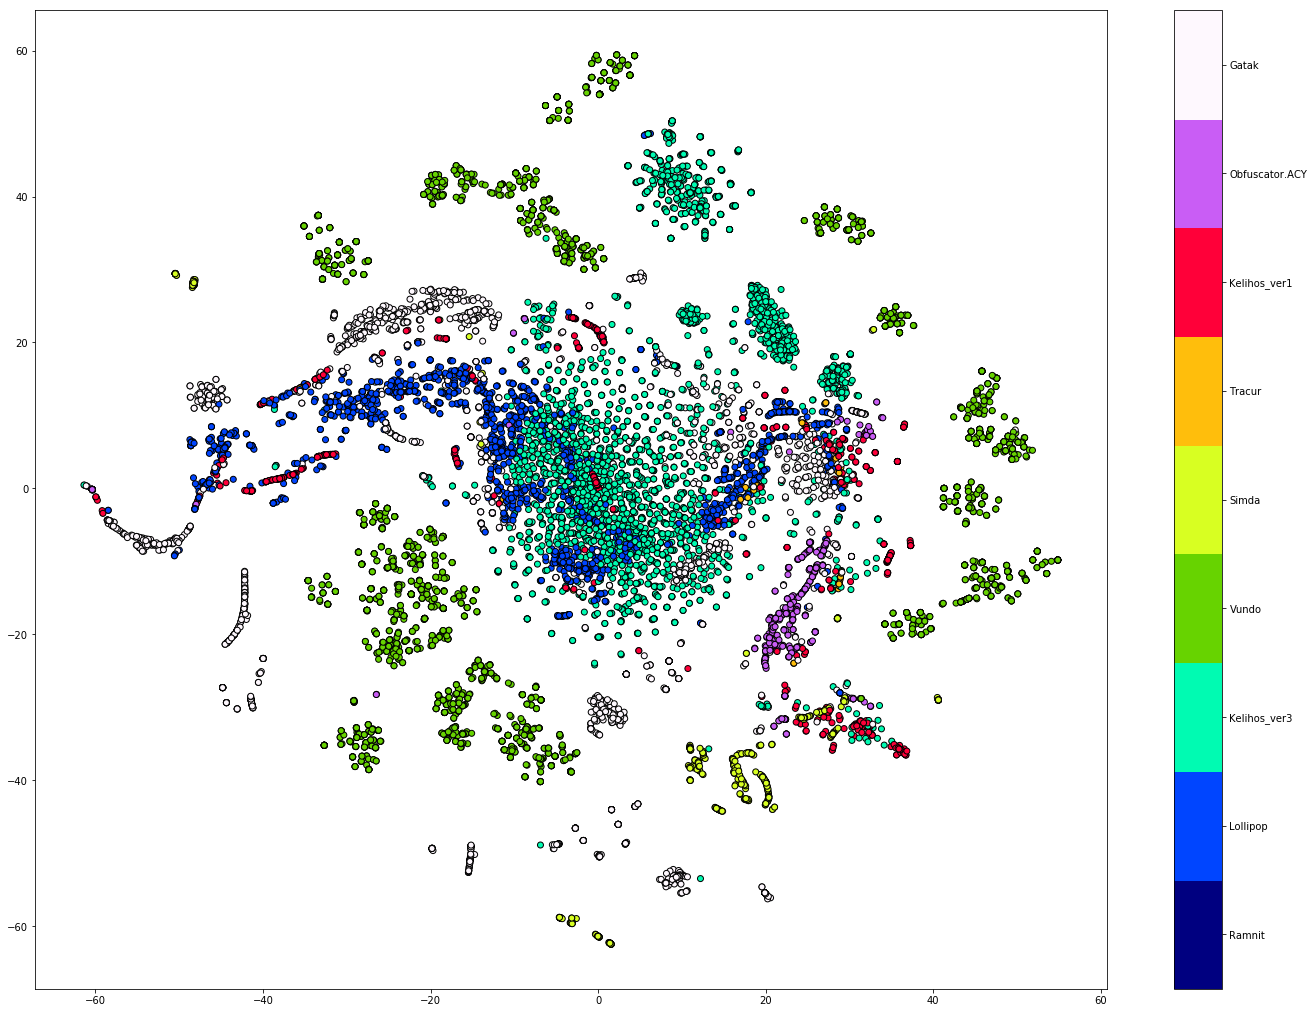

In [20]:
print("Plotting t-SNE ...")
figure = plt.gcf()
figure.set_size_inches(24, 18)
plt.scatter(vis_data[:, 0], vis_data[:, 1], c=y, cmap=plt.cm.get_cmap("gist_ncar", len(list_fams)),edgecolors="black")
plt.clim(-0.5, len(list_fams)-0.5)
cbar = plt.colorbar(ticks=range(len(list_fams)))
cbar.ax.set_yticklabels(list_fams)                     
plt.show()

In [21]:
# Create stratified k-fold subsets                                                                                                                                        
kfold = 10  # no. of folds                                                                 
skf = StratifiedKFold(kfold, shuffle=True,random_state=1)
skfind = [None] * kfold  # skfind[i][0] -> train indices, skfind[i][1] -> test indices
cnt = 0                                              
for index in skf.split(X, y):         
    skfind[cnt] = index                                                 
    cnt += 1 

In [ ]:
# Training top_model and saving min training loss weights
conf_mat = np.zeros((len(list_fams),len(list_fams))) # Initializing the Confusion Matrix
for i in range(kfold):
    train_indices = skfind[i][0]
    test_indices = skfind[i][1]
    X_train = X[train_indices]
    y_train = y[train_indices]
    X_test = X[test_indices]
    y_test = y[test_indices]
    
    top_model = svm.SVC()
    top_model.fit(X_train,y_train)  # Training
    y_pred = top_model.predict(X_test)  # Testing
    print("[%d] Test acurracy: %.4f" %(i,accuracy_score(y_test,y_pred)))
    cm = confusion_matrix(y_test,y_pred)  # Compute confusion matrix for this fold
    conf_mat = conf_mat + cm  # Compute global confusion matrix

In [ ]:
# Computing the average accuracy
avg_acc = np.trace(conf_mat)/sum(no_imgs)
print("Average acurracy: %.4f" %(avg_acc))

In [ ]:
# Viewing the confusion matrix
conf_mat = conf_mat.T  # since rows and cols are interchangeable
conf_mat_norm = conf_mat/no_imgs  # Normalizing the confusion matrix

In [ ]:
print("Plotting the confusion matrix")
conf_mat = np.around(conf_mat_norm,decimals=2)  # rounding to display in figure
figure = plt.gcf()
figure.set_size_inches(24, 18)
plt.imshow(conf_mat,interpolation='nearest')
for row in range(len(list_fams)):
    for col in range(len(list_fams)):
        plt.annotate(str(conf_mat[row][col]),xy=(col,row),ha='center',va='center')
plt.xticks(range(len(list_fams)),list_fams,rotation=90,fontsize=10)
plt.yticks(range(len(list_fams)),list_fams,fontsize=10)
plt.title('Confusion matrix')
plt.colorbar()
plt.show()